In [1]:
#Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#For GeoTIFF images
import rasterio
from rasterio.plot import show
from osgeo import gdal

In [3]:
#For Visualisation
from matplotlib import pyplot as plt
import matplotlib.image as img
from matplotlib.pyplot import figure
from PIL import Image

In [4]:
# Model Building
# import ultralytics
# from ultralytics import YOLO
# import labelme2yolo

In [5]:
# Others
import os
import shutil
import zipfile

In [6]:
# !wget https://challenge.ey.com/api/v1/storage/admin-files/Pre_Event_San_Juan.tif -O Pre_Event_San_Juan.tif

In [7]:
# !wget https://challenge.ey.com/api/v1/storage/admin-files/Post_Event_San_Juan.tif -O Post_Event_San_Juan.tif

In [8]:
pre_event_image = './Pre_Event_San_Juan.tif'
post_event_image ='./Post_Event_San_Juan.tif'

In [9]:
src = rasterio.open(pre_event_image)

In [10]:
type(src)

rasterio.io.DatasetReader

In [11]:
src.count #counts the bands in the dataset object

3

In [12]:
src.height #number of rows

74602

In [13]:
src.width #number of columns

38259

In [14]:
src.indexes #one index for each band

(1, 2, 3)

In [15]:
src.dtypes #datatypes of values stored in each band's 2D matrix; here all three bands have unsigned 8-bit integers

('uint8', 'uint8', 'uint8')

In [16]:
coverage_width = src.bounds.right - src.bounds.left #in metres
print(coverage_width)

11675.72021484375


In [17]:
coverage_height = src.bounds.top - src.bounds.bottom #in metres
print(coverage_height)

22766.7236328125


In [18]:
src.transform

Affine(0.30517578125, 0.0, 796698.0000016,
       0.0, -0.30517578125, 2045626.21911)

In [19]:
src.crs

CRS.from_epsg(32619)

In [20]:
red_band = src.read(1)

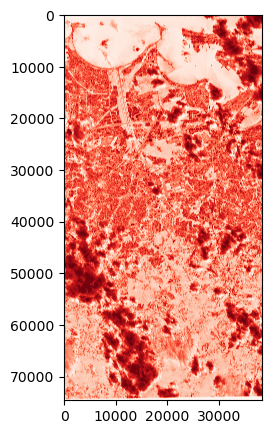

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(20, 5))
ax.imshow(red_band,cmap='Reds')

In [27]:
#saving to JPEG using GDAL
dataset = gdal.Open(pre_event_image)

options_list = [
    '-of PNG'
]

options_string = " ".join(options_list)

gdal.Translate(
    'pre-event-image.png',
    pre_event_image,
    options=options_string
)

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7cd6dc54ef70> >

In [ ]:
#note that you should be able to visualize it easily using QGIS; fairly high res PDFs are available in the data/training folder